## Objectif

L'objectif de ce projet est d'utiliser différentes techniques d'analyse de données et machine learning pour une analyse détaillée des clients d'une entreprise et faire la segmentation.

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib as plt

In [2]:
#recuperons les données
segmentation_url = 'https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/87e3ec06-a99f-42bf-b292-074d02f31a94.csv'
df = pd.read_csv( segmentation_url, sep=('\t'))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Description des variables

ID : Identifiant unique du client

Year_Birth : année de naissance du client

Education : niveau d'education du client

Marital_Status : Etat civil du client

income : Revenu annuel du menage du client

Kidhome : nombre d'enfants dans le menage du client

Teenhome : Nombre d'adolescents dans le menage du client

Dt_Customer : Date d'inscription du client aupres de l'entreprise

Recency : nombre de jours depuis le dernier achat du client

Plainte : 1 si le client s'est plaint au cours des 2 dernieres années, 0 sinon



MntWines : Montant dépense pour le vin au cours des 2 dernieres années

MntFruits : Montant depense en fruits au cours des 2 dernieres années

MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années

MntFishProducts : montant dépense pour le poisson au cours des 2 derniÃ¨res annÃ©es

MntSweetProducts : montant depense en sucreries au cours des 2 dernieres annees

MntGoldProds : Montant dépensé en or au cours des 2 dernières années


NumDealsPurchases : nombre d'achats effectués avec une remise

AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1Ã¨re campagne, 0 sinon

AcceptedCmp2 : 1 si le client a acceptÃ© l'offre lors de la 2Ã¨me campagne, 0 sinon

AcceptedCmp3 : 1 si le client a acceptÃ© l'offre dans la 3Ã¨me campagne, 0 sinon

AcceptedCmp4 : 1 si le client a acceptÃ© l'offre lors de la 4Ã¨me campagne, 0 sinon

AcceptedCmp5 : 1 si le client a acceptÃ© l'offre lors de la 5Ã¨me campagne, 0 sinon

Response : 1 si le client a accepté l'offre lors de la derniÃ¨re campagne, 0 sinon


NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise

NumCatalogPurchases : Nombre d'achats effectués Ã  l'aide d'un catalogue

NumStorePurchases : Nombre d'achats effectués directement en magasin

NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois

# Analyse exploratoire

In [3]:
df = df.copy()

In [4]:
df.shape

(2240, 29)

In [5]:
#les informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#supprimons les colonnes qui ne vont pas nous servir
df = df.drop(['ID','Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis =1)

In [7]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Divisons notre dataset pour regrouper les données qualitatifs et les données quantitatifs

In [8]:
#données qualitatifs
df_qual = df.select_dtypes(object)
df_qual

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [9]:
#données quantitatifs
df_quant = df.select_dtypes(exclude = object)
df_quant

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,3,4,5,0,0,0,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,3,13,6,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,5,10,3,0,0,0,0,0,0,0


### Visualisons les données 

Nous allons effectué une serie de visualisation en fonction de l'acceptation de l'offre des différentes campagnes

In [10]:
#catégorisons les ages
df['Year_Birth'].max(), df['Year_Birth'].min()
#les ages sont compris entre 1996 et 1893

(1996, 1893)

In [11]:
#l'age maximum sera 2021- 1893 = 128 ans
#l'age minimun sera 2021 - 1996 =  25 ans

In [12]:
#creons une fonction pour categoriser les ages
def ages(x):
    if x<=25:
        annee='< 25 ans'
    if 25<x<=45:
        annee='25 - 45 ans'
    if 45<x<=65:
        annee='45 - 65 ans'
    if x>=65:
        annee='> 65 ans'
    return annee

In [13]:
df['ages']= 2021 - df["Year_Birth"]
df['age']=df["ages"].map(ages)

In [14]:
#regroupons tout les clients  en fonction de leur age et leur nombre d'achats effectués
client_achat = df.groupby('age').sum()[['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases']]
client_achat

,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
age,,,
25 - 45 ans,3698,2489,1620
45 - 65 ans,6493,4662,2927
< 25 ans,5,4,1
> 65 ans,2774,1995,1415


la majorité des clients qui ont effectués directement un achat en magasin ont un age compris entre 45 et 65 ans

In [15]:
#regroupons tout les clients  en fonction de leur age et leur situation matrimoniale
education_achat = df.groupby('Education').sum()[['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases']]
education_achat

,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
Education,,,
2n Cycle,1118,757,471
Basic,154,102,26
Graduation,6570,4649,3072
Master,2182,1492,951
PhD,2946,2150,1443


In [16]:
#regroupons tout les clients  en fonction de leur education et leur nombre d'achats effectués
status_achat = df.groupby('Marital_Status').sum()[['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases']]
status_achat

,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
Marital_Status,,,
Absurd,13,7,15
Alone,12,15,2
Divorced,1350,1000,620
Married,5055,3532,2268
Single,2707,1859,1248
Together,3327,2367,1552
Widow,494,356,256
YOLO,12,14,2


In [17]:
#regroupons tout les clients  en fonction de leur age et et ceux qui ont accceptés l'offre de la premiere campagne en fonction de leur salaire
client_achat = df.groupby('age').sum()[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
client_achat

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
age,,,,,,
25 - 45 ans,49,6,65,35,57,108
45 - 65 ans,61,19,71,94,66,159
< 25 ans,0,0,1,0,0,1
> 65 ans,34,5,26,38,40,66


<AxesSubplot:xlabel='AcceptedCmp1', ylabel='count'>

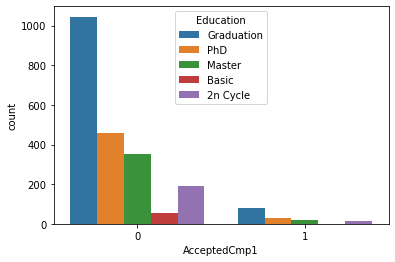

In [18]:
#visualisons les clients qui ont accceptés l'offre de la premiere campagne en fonction de leur salaire
sn.countplot(x = 'AcceptedCmp1', hue = 'Education', data = df)

<AxesSubplot:xlabel='AcceptedCmp2', ylabel='count'>

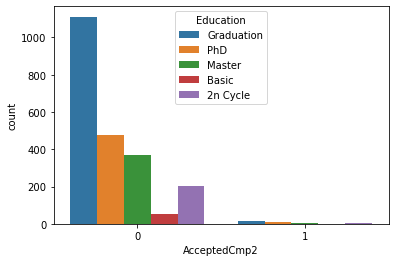

In [19]:
sn.countplot(x = 'AcceptedCmp2', hue = 'Education', data = df)

<AxesSubplot:xlabel='Response', ylabel='count'>

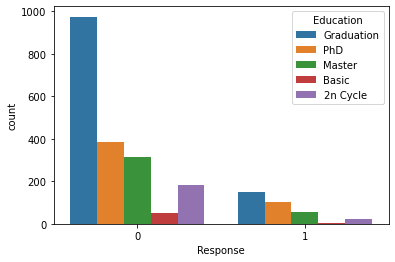

In [20]:
sn.countplot(x = 'Response', hue = 'Education', data = df)

Ces graphiques nous montrent que la pluspart de ceux qui n'ont pas accepté l'offre des differentes campagnes ont une education elevée 
Examinons en fonction de leur situation matrimoniale

<AxesSubplot:xlabel='AcceptedCmp1', ylabel='count'>

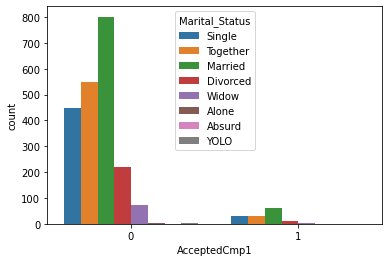

In [21]:
sn.countplot(x = 'AcceptedCmp1', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='AcceptedCmp4', ylabel='count'>

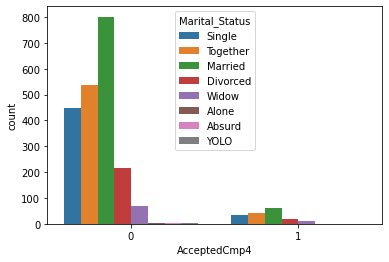

In [22]:
sn.countplot(x = 'AcceptedCmp4', hue = 'Marital_Status', data = df)

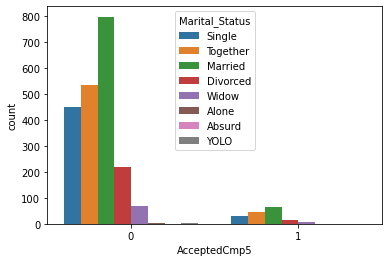

In [23]:
sn.countplot(x = 'AcceptedCmp5', hue = 'Marital_Status', data = df);

ici la majorité de ceux qui n'ont pas accepté l'offre des différentes campagnes sont mariés ou vivent en concubinage

In [24]:
#visualisons en fonction de l'age 

### Une Analyse plus poussée des différentes variables requiers plusieurs jours afin de cerner tous les contours du dataset

### Preprocessing

In [25]:
#voir les valeurs manquantes
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
ages                    0
age                     0
dtype: int64

Nous observons 24 valeurs manquantes au niveau de la variable icombe(revenu annuel)

In [26]:
#traitement des valeurs manquantes
#nous allons supprimer les valeurs manquantes car elle ne represente pas une grande quantité dans les données
df.dropna(axis = 0, inplace = True)

In [27]:
#verification des valeurs manquantes
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
ages                   0
age                    0
dtype: int64

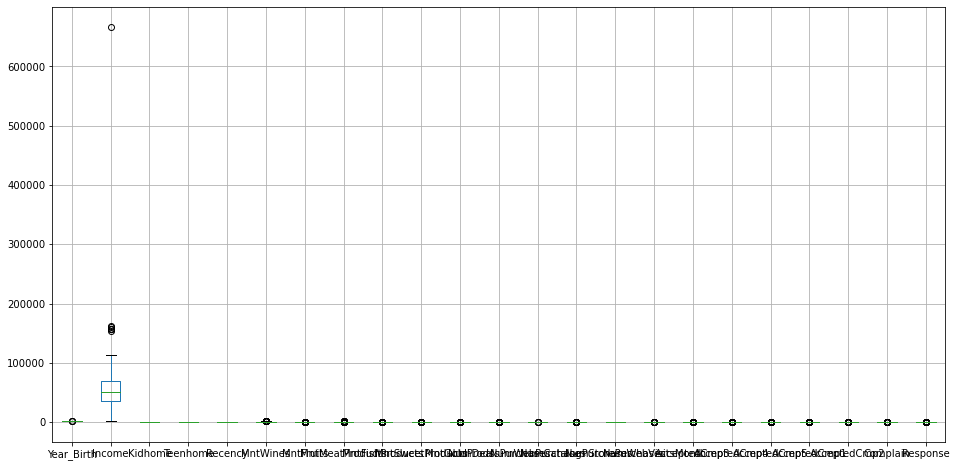

In [28]:
#voir les valeurs aberrantes
df_quant.boxplot(figsize=(16,8));

les boxplots nous montrent qu'ils existe des valeurs aberrantes. elles seront traitée apres si jamais notre modelisation n'est pas satisfaisante

In [29]:
#correlation entre les variables
df_quant.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,0.490924,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,0.117372


Cette matrice de corrélation nous montre qu'il n'existe pas de forte corrélation entre les différentes variables.
Ainsi une selection de variable serait effectué au niveau de la modelisation.

In [30]:
#encodage des variables qualitatifs
df_qual

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [31]:
df['Education'].value_counts(), df['Marital_Status'].value_counts()

(Graduation    1116
 PhD            481
 Master         365
 2n Cycle       200
 Basic           54
 Name: Education, dtype: int64,
 Married     857
 Together    573
 Single      471
 Divorced    232
 Widow        76
 Alone         3
 Absurd        2
 YOLO          2
 Name: Marital_Status, dtype: int64)

In [32]:
df['Marital_Status'].replace({'Married':1, 'Together': 2, 'Single':3, 'Divorced':4, 'Widow':5, 'Alone':6, 'YOLO':7, 'Absurd':8}, inplace = True)

In [33]:
def encode(data):
    code1 = {
        'Graduation':0,      
        'PhD':1,
        'Master':2,
        '2n Cycle':3,        
        'Basic':4,
    }

    for col in data.select_dtypes('object'):
        data[col] = data[col].map(code1)
    return data

In [34]:
encode(df)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,ages,age
0,1957,0,3,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,64,NaN
1,1954,0,3,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,67,NaN
2,1965,0,2,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,56,NaN
3,1984,0,2,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,37,NaN
4,1981,1,1,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,0,1,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,0,54,NaN
2236,1946,1,2,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,0,75,NaN
2237,1981,0,4,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,0,40,NaN
2238,1956,2,2,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,0,65,NaN


A cette etape nous devons faire la normalisation des données , mais cette normalisation n'est pas souvent necessaire. De cet fait , apres la modelisation, nous y reviendrons en fonction de nos resultats.